<img src='https://www.rc.colorado.edu/sites/all/themes/research/logo.png' style="height:75px">

# Python Overview

## Objectives

- Review python
- Introduction to functional concepts
- Data analysis and visualization workflow

# Scientific Hello World

In [1]:
from __future__ import print_function
import math
r = float("4.2")
s = math.sin(r)
print('hello world! The sin({0}) = {1:0.2f}'.format(r,s))

hello world! The sin(4.2) = -0.87


There is a lot happening here!  

# Functional Python

<blockquote>
Python acquired lambda, reduce, filter and map, courtesy of a Lisp hacker who missed them and submitted working patches. -Guido van Rossum
</blockquote>

- `map` 
- `reduce`
- `filter`
- `lambda`
- And more: [itertools](https://docs.python.org/2/library/itertools.html), [pytoolz](https://github.com/pytoolz/toolz/)


## The `map` abstraction


How do we apply a function on a list of numbers?

Function: $x**2$

List: [1,2,3,4]

In [4]:
def square(x):
    return x*x

numbers = [1,2,3,4]


In [5]:
def map_squares(nums):
    res = []
    for x in nums:
        res.append( square(x) )
    return res

map_squares(numbers)

[1, 4, 9, 16]

or...

In [6]:
results = map(square, numbers)
results

[1, 4, 9, 16]

## Anonymous functions: `lambda`

In [7]:
lambda_square = lambda x: x*x
map(lambda_square, range(10))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [8]:
map(lambda x: x*x, range(10))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [9]:
res = map(lambda x: x*x, range(10))
print(res)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


## `reduce`

Apply a function with **two** arguments cumulatively to the container.

In [7]:
def add_num(x1, x2):
    return x1+x2

print(reduce(add_num, res))

285


In [8]:
print(reduce(lambda x,y: x+y, res))

285


## `filter`

Constructs a new list for items where the applied function is `True`.

In [9]:
def less_than(x):
    return x>10

filter(less_than, res)

[16, 25, 36, 49, 64, 81]

In [10]:
filter(lambda x: x>10, res)

[16, 25, 36, 49, 64, 81]

## Data Analysis Hello World

How many unique words are in Hamlet?

In [11]:
import os
hamlet = os.path.join('data','hamlet.txt')

In [12]:
import re
words = re.findall(r'\w+', open(hamlet).read().lower())

print(len(set(words)), 'unique words')

4086 unique words


- string conversion
- regular expressions
- sets

### Frequency of words?

Words greater than lenth `2`

In [13]:
words = filter(lambda x: len(x)>2, words)
print(words[:10])

['hamlet', 'dramatis', 'personae', 'claudius', 'king', 'denmark', 'king', 'claudius', 'hamlet', 'son']


A favorite python data structure, the `dicionary`.

In [14]:
d = dict() # could use {}
for w in words:
    d[w] = d.get(w,0) + 1

- get(key, default)

## Sorting dictionarys, `lambdas`

In [15]:
sorted_items = sorted(d.items(), key=lambda x: x[1], reverse=True)

tmp = map(print, sorted_items[:5])

('the', 930)
('and', 843)
('you', 496)
('hamlet', 368)
('that', 346)


- lambdas
- map

## Wrangling

In [16]:
values = map(lambda x: x[1], sorted_items[:20])
labels = map(lambda x: x[0], sorted_items[:20])

In [18]:
_ = print(values), print(labels)

[930, 843, 496, 368, 346, 278, 262, 238, 238, 232, 232, 215, 211, 186, 171, 160, 149, 134, 124, 112]
['the', 'and', 'you', 'hamlet', 'that', 'lord', 'not', 'his', 'this', 'with', 'but', 'for', 'your', 'what', 'king', 'him', 'have', 'will', 'polonius', 'horatio']


### List Comprehension

In [19]:
values = [ x[1] for x in sorted_items[:20] ]
labels = [ x[0] for x in sorted_items[:20] ]

- another favorite: list comprehension!
- selection

### Visualize

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import utils
reload(utils)

<module 'utils' from 'utils.pyc'>

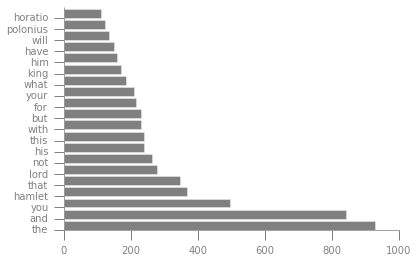

In [21]:
plt.barh(range(len(values)), values, color='grey')
plt.yticks(range(len(values)), labels)
plt.show()

## Process

- Raw data (maybe BIG)
- Processing (*wrangling*)
- Exporatory Data Analysis
- Analysis
- Visualization
- Web app?

**Methods**: R, Python, Matlab, IDL, Excel,...

**Python**: 
+ notebook, numpy, matplotlib, pandas, scikit-learn, 
+ pyspark, ipython parallel